In [8]:
import numpy as np
import cv2
from scipy.ndimage.morphology import distance_transform_edt
from warnings import warn
import matplotlib.pyplot as plt
from mmseg.datasets.transforms import Mask2Edge

/tmp/ipykernel_2550673/756288679.py:3: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


In [9]:
input_img = cv2.imread("/home/robert.breslin/alessandro/paper_2/mmsegmentation/data/misc/frankfurt_000000_000294_gtFine_labelTrainIds.png")

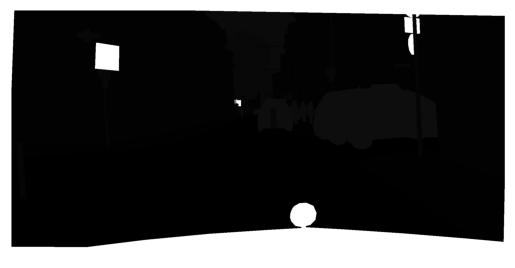

In [10]:
plt.axis('off')
plt.imshow(input_img)

In [11]:
display(input_img.shape, np.array_equal(input_img[:,:,0], input_img[:,:,1]), np.array_equal(input_img[:,:,0], input_img[:,:,-1]))

(1024, 2048, 3)

True

True

In [12]:
mask_input = input_img[:,:,0]
display(mask_input.shape)

(1024, 2048)

In [13]:
labelIds = list(range(0,19))
display(type(labelIds), labelIds)

list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [15]:
mask2edges = Mask2Edge(labelIds=labelIds)
input_dict = {'gt_seg_map': mask_input}
pack = mask2edges(input_dict)

In [16]:
display(pack.keys())

dict_keys(['gt_seg_map', 'gt_edge_map', 'radius'])

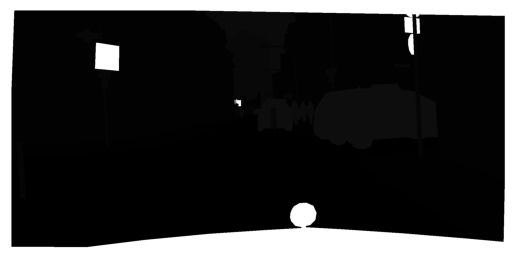

In [17]:
plt.axis('off')
plt.imshow(pack['gt_seg_map'], cmap='gray')

In [18]:
display(np.unique(pack['gt_seg_map']))

array([  0,   1,   2,   4,   5,   7,   8,  10,  11,  13, 255], dtype=uint8)

In [19]:
display(pack['gt_edge_map'].shape, pack['gt_edge_map'].dtype, np.unique(pack['gt_edge_map']), np.unique(pack['gt_edge_map'][0]))

(19, 1024, 2048)

dtype('uint8')

array([0, 1], dtype=uint8)

array([0, 1], dtype=uint8)

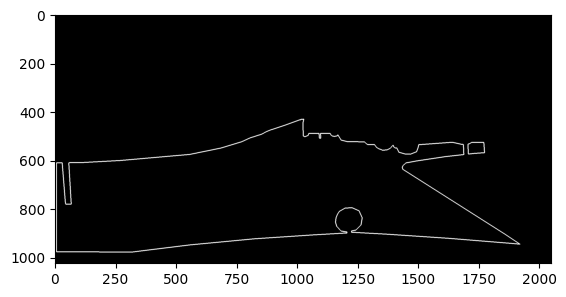

In [20]:
plt.imshow(pack['gt_edge_map'][0], cmap='gray')

(1024, 2048)

array([ 0,  1,  2,  3,  5,  6,  8,  9, 11, 12])

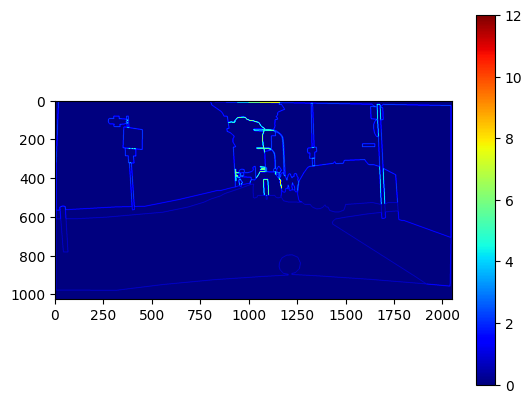

In [21]:
mask = pack['gt_edge_map'].copy()
# Your mask: shape (19, H, W)
# Compute the max value across channels for each pixel
max_values = np.max(mask, axis=0)

# Compute the argmax (class indices 0 to 18, corresponding to classes 1 to 19)
class_indices = np.argmax(mask, axis=0)

# Create the label image: assign class 0 where max==0, else shift argmax by +1
label_image = np.where(max_values > 0, class_indices + 1, 0)
display(label_image.shape, np.unique(label_image))

# Optional: If your mask is multi-label with overlaps, this still picks the "winning" class per pixel via argmax.
# For true multi-label viz without collapsing to one class, consider alternatives below.

# Visualize
plt.imshow(label_image, cmap='jet')  # Use a colormap like 'jet' or 'tab20' for distinct classes
plt.colorbar()  # Shows class indices in the bar
plt.show()

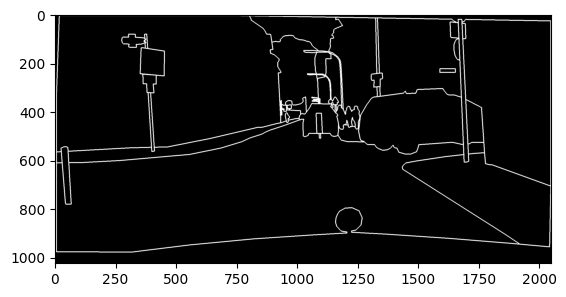

In [22]:
tmp = label_image.copy()
tmp[tmp > 0] = 255
plt.imshow(tmp, cmap='gray')